# Yelp Reviews Classification

### by ReDay Zarra

This project covers the topic of **natural language processing or NLP to classify 
user-generated text and determine their intent**. The goal of this project is to build
a model that can automatically classify 10,000 Yelp reviews into one of several predefined
categories, such as "positive," "negative," or "neutral." To accomplish this, the 
project uses NLP techniques to process and analyze the text of the reviews.

The model can then be used to predict the label for new, unseen reviews. This can 
be especially useful for businesses, as it can help them **identify patterns in 
customer feedback and make improvements to their products or services**.

## Importing the necessary libraries

In [47]:
import pandas as pd
import numpy as np

> Pandas is a library used for data frame manipulations 

> NumPy is a package used for numerical analysis

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('darkgrid')

>Libraries used for plotting and data visualization

## Importing the dataset

Importing the dataset with the .read_csv method from Pandas to load the dataset and storing it in the yelp_reviews variable. We can take a glimpse at the dataset with the built-in Pandas methods.

In [49]:
yelp_reviews = pd.read_csv('yelp.csv')

In [50]:
yelp_reviews.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


> The .head() method is used to **show the first five rows** of the dataframe.

In [51]:
yelp_reviews.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


> The .tail() method is used to **show the last five rows** of the dataframe.

In [52]:
yelp_reviews.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


> The **.describe() method from Pandas gives us a summary** of what the dataset contains. The **count tells us the number of values** in the dataset for each feature so 10,000 total reviews. The **mean tells us the mean of each column**, for example the mean for the stars is 3.78 while 0.88 is the mean for the cool votes column. The **std, or standard deviation**, column is 1.2 which **is the dispersion around the mean**. The smallest value for each dataset is stored in the **min** column, while the maximum is stored in the **max**. Finally, the **quartiles** are represented by the 25%, 50% (median), and 75%

In [53]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


> There are **no missing values in our dataset**, which is a great thing because our model has more data to work with

In [54]:
print(yelp_reviews['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


> Allows us to **target the 'text' column** and access the first review inside

## Visualizing the dataset

Visualizing the dataset to better understand the dataset. We will count the words 
in the dataset and add it in a new column in our dataset.

### Creating length column

In [55]:
yelp_reviews['length'] = yelp_reviews['text'].apply(len)

> Using the .apply(len) function to find the length of every review in the text column

In [56]:
yelp_reviews

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


### Plotting length column

Text(0, 0.5, 'Number of Reviews')

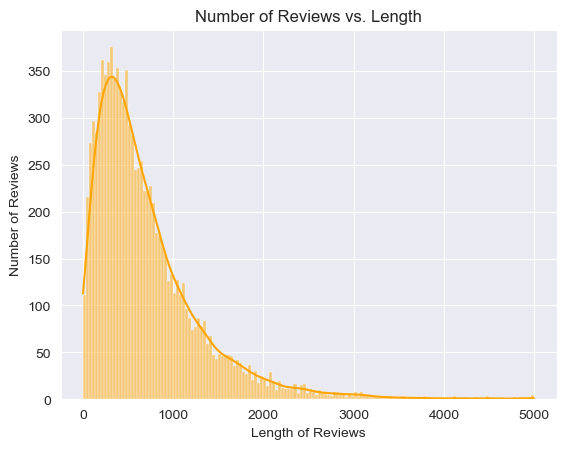

In [73]:
sns.histplot(yelp_reviews['length'], bins=150, color='orange', kde=True)
plt.title("Number of Reviews vs. Length")
plt.xlabel("Length of Reviews")
plt.ylabel("Number of Reviews")

> The histogram tells us that the length of the reviews is **positively skewed**.

> The .histplot() method from Seaborn creates a histogram as long as you provide the parameters for the number of bins (or bars). The kde is the kernel density estimate and it closely follows the top of the histogram bars. Fro

In [59]:
yelp_reviews.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

> Shows us a summary of the length column where we can observe characteristics such as mean, deviation, quartiles, and more. 

### Exploring min and max length reviews

In [60]:
yelp_reviews[yelp_reviews['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

> We know the length of the largest review is 4997 from the .describe() function. So we can use the max value to specify that we are looking for the maximum length review, then we can access it's text column and print it out.

In [61]:
yelp_reviews[yelp_reviews['length'] == 1]['text'].iloc[0]

'X'

> Using the same method from earlier to locate and print the review with the minimum length

### Plotting the star count for reviews

<AxesSubplot:xlabel='count', ylabel='stars'>

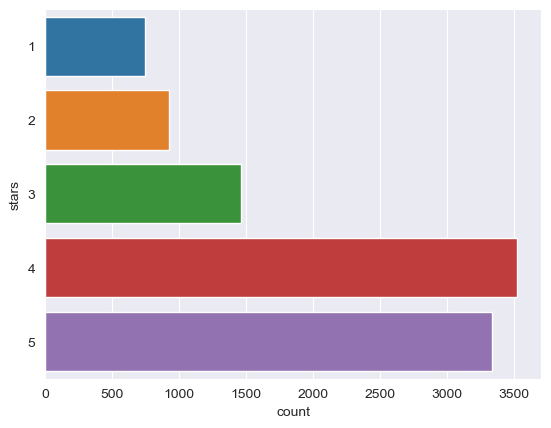

In [62]:
sns.countplot(y = 'stars', data = yelp_reviews)

> Using the Seaborn .countplot() method to assign the y-axis as the stars column from the yelp_reviews dataset